In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

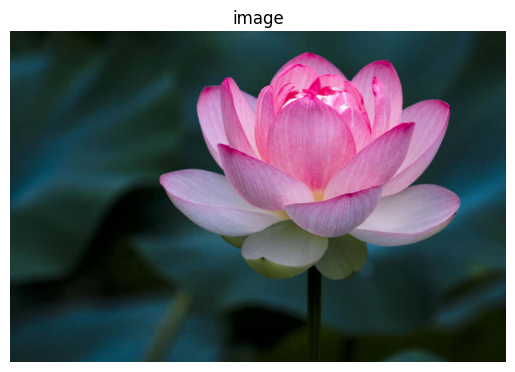

In [5]:
# Display the original image
img = plt.imread('image.png' )
plt.imshow(img)
plt.title('image' )
plt.axis('off')
plt.show()

In [3]:
# Print image information
print(type(img))
print(img.shape)
print(img.ndim)
print(img.size)
print(img.dtype)

<class 'numpy.ndarray'>
(600, 900, 3)
3
1620000
float32


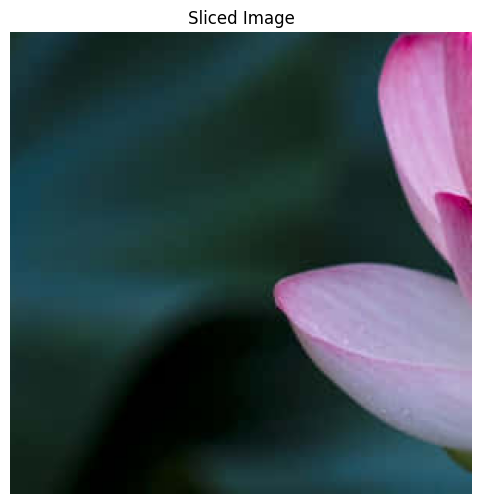

In [6]:
# Slicing: Display a portion of the image
plt.figure(figsize=(8, 6))
plt.imshow(img[100:400, 100:400, :])
plt.title('Sliced Image')
plt.axis('off')
plt.show()

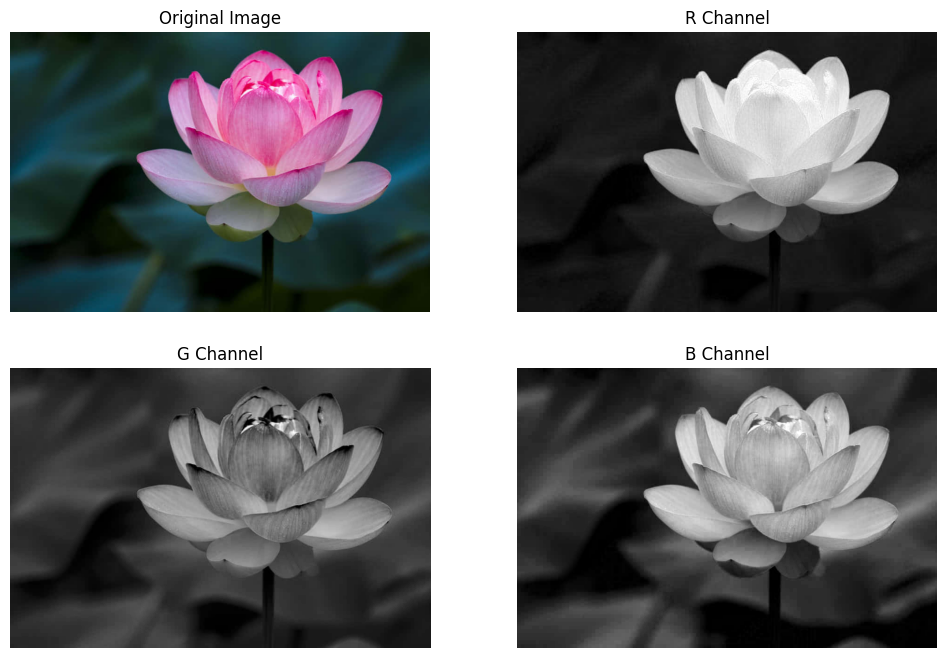

In [7]:
# RGB Channels: Separate and display R, G, B channels
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

output = [img, R, G, B]
titles = ['Original Image', 'R Channel', 'G Channel', 'B Channel']

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.title(titles[i])
    if i == 0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i], cmap='gray')
plt.show()

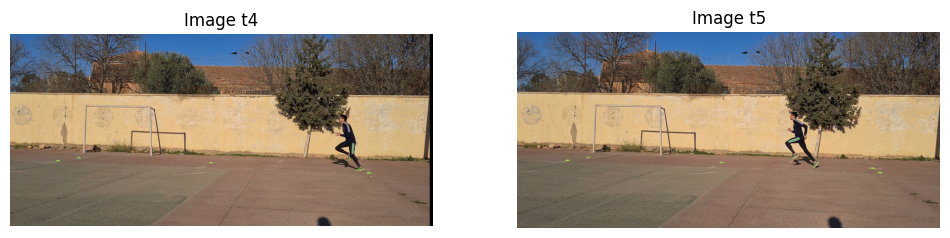

In [14]:
# Motion Difference (using example images - replace with your own)
t4 = plt.imread('t4.jpg') # Placeholder - replace with your actual image
t5 = plt.imread('t5.jpg') # Placeholder - replace with your actual image
# Create a figure and subplots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot t4
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(t4)
plt.title('Image t4')
plt.axis('off')  # Optional: Turn off axis ticks and labels

# Plot t5
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(t5)
plt.title('Image t5')
plt.axis('off')  # Optional

# Display the plots
plt.show()


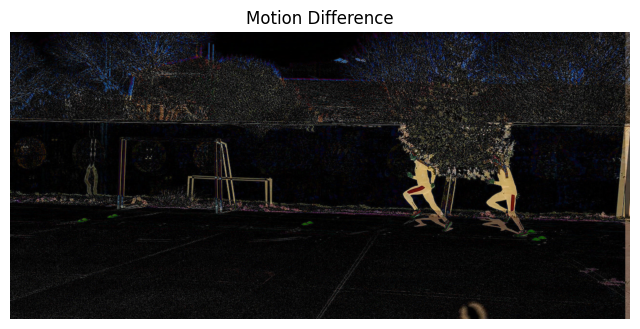

In [13]:

t4_resized = cv2.resize(t4, (t5.shape[1], t5.shape[0]))  # (width, height)

# Ensure images are of the same size for subtraction
if t4_resized.shape != t5.shape:
    print("Error: Images must have the same dimensions for motion difference.")
else:
    motion_diff = np.abs(t5.astype(np.int16) - t4_resized.astype(np.int16)).astype(np.uint8)  # Use int16 to avoid overflow/underflow

    plt.figure(figsize=(8, 6))
    plt.imshow(motion_diff)
    plt.title('Motion Difference')
    plt.axis('off')
    plt.show()

(-0.5, 1279.5, 592.5, -0.5)

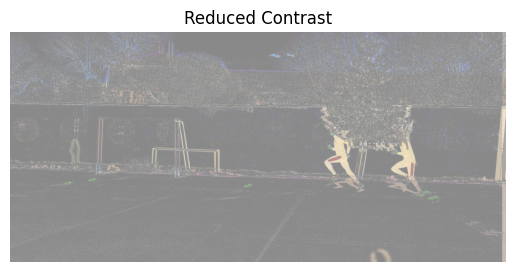

In [24]:
low_contrast_img = motion_diff * 0.5 + 137
low_contrast_img = np.clip(low_contrast_img, 0, 255).astype(np.uint8)

plt.imshow(low_contrast_img)
plt.title('Reduced Contrast')
plt.axis('off')

(-0.5, 1279.5, 592.5, -0.5)

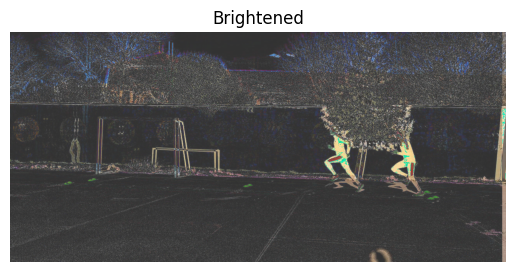

In [25]:

brightened_img = motion_diff + 50  # Add a constant value to all pixels
brightened_img = np.clip(brightened_img, 0, 255).astype(np.uint8)

plt.imshow(brightened_img)
plt.title('Brightened')
plt.axis('off')


(-0.5, 1279.5, 592.5, -0.5)

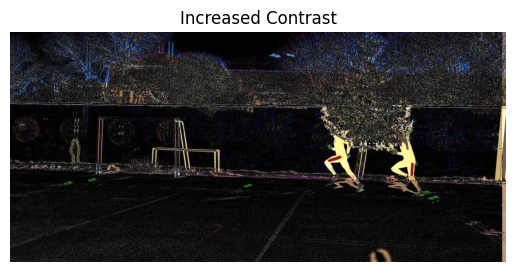

In [26]:
high_contrast_img = motion_diff * 1.5   # Amplify the pixel differences.
high_contrast_img = np.clip(high_contrast_img, 0, 255).astype(np.uint8)

plt.imshow(high_contrast_img)
plt.title('Increased Contrast')
plt.axis('off')